# Graph Making and Implementaion of ICM Model



	 Graph Characteristics
Total Number of nodes are: 
5
Total Number of edges are: 
6
The highest degree node is:  
Table
Nodes Sharing maximum weighted edge are:  
[('Table', 'Paper')]


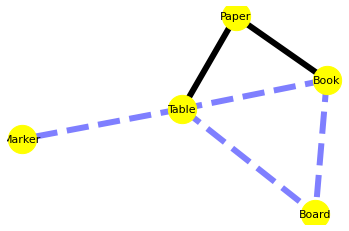

	 Implementation of Independent Cascade Model
Activated nodes in 0 iteration:  Book
Activated nodes in 1 iteration:  Table
Activated nodes in 1 iteration:  Paper
Activated nodes in 2 iteration:  Marker

Activated nodes in the graph after applying ICM:  ['Book', 'Table', 'Paper', 'Marker']

Non Activated nodes in the graph are:  [['Board']]


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import Counter

G= nx.Graph()
class Node:
    def __init__(self,label = 'anonymous',degree=0):
        self.label = label
        self.degree = degree
    def get_label(self):
        return self.label
    def get_degree(self):
        return self.degree
    def __str__(self):
        return self.label  
class Edge:
    def __init__(self, weight=0.0):
        self.weight = weight
    def get_weight(self):
        return self.weight
    def __str__(self):
        return self.weight
    
class Graph:
    def __init__(self):
        pass
    def add_node(node):
        lbl = node.get_label()
        G.add_node(node,label=lbl)
    def add_edge(edge,src,dest):
        wgt = edge.get_weight()
        G.add_edge(src,dest,weight=wgt)
        
def totalnodes(list):
    print("Total Number of nodes are: ")
    return len(list)

def totaledges(list):
    print("Total Number of edges are: ")
    return len(list)

def highestdegreenode(nodes):
    degrees ={ node.get_label() : node.get_degree() for node in nodes }
    max_degree = max(degrees, key=degrees.get)
    print("The highest degree node is:  ")
    return max_degree

def highestweightedge():
    print("Nodes Sharing maximum weighted edge are:  ")
    return [(u.get_label(),v.get_label()) for (u,v,d) in G.edges(data=True) if d['weight'] == 1]

def show_graph():
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=800,node_color = 'yellow')
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5] #for high weighted edgee
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5] #for low weighted edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed")
    nx.draw_networkx_labels(G, pos, font_size=11, font_family="sans-serif",font_color = 'black')
    plt.axis("off")
    plt.show()

def ICM(g,s,p): #function to implement Independent Cascade Model ICM
    just_activated = list(s) #just activates represent nodes that are activated in each iteration
    activated = list(s) #activated represents nodes that have been activated once 
    i=0
    while(1):
        if len(just_activated)==0: #If just activated = [], means there are no more nodes to be activated so terminate the loop
            return activated
        for u in just_activated: #printing nodes that are activated in each iteration
            print(f"Activated nodes in {i} iteration: ",u.get_label())
        i=i+1
        temp=[] #a tempeorary list to hold the just_activated values and update them after each iteration
        for nodes in just_activated:
            for node in g.neighbors(nodes):
                r=random.uniform(0,1)
                if r<p and node not in activated and node not in temp:
                    #node once activated should not be used again
                        temp.append(node)
        for nodes in temp:
                activated.append(nodes)
        just_activated = list(temp) #update list after each iteration
        
def activated_nodes(List): #function to return list of activated nodes
    return [u.get_label() for u in List]

def non_activated_nodes(nodes,act_nodes): #function to return list of non activated nodes
    nodes_lbl = []
    for u in nodes:
        nodes_lbl.append(u.get_label())
    non_activated_nodes = []
    non_activated_nodes.append(list((Counter(nodes_lbl)-Counter(act_nodes)).elements()))
    return non_activated_nodes
                
            
    

    


    
#Define all nodes
node1 = Node('Book',3)
node2 = Node('Table',4)
node3 = Node('Paper',2)
node4 = Node('Marker',1)
node5 = Node('Board',2)
nodes = [node1,node2,node3,node4,node5]

#Define all edges
#Normalize weights by dividing it with the maximum weight which is 3 here.
edge1 = Edge(0.33)
edge2 = Edge(0.66)
edge3 = Edge(0.5)
edge4 = Edge(1)
edge5 = Edge(0.33)
edge6 = Edge(0.33)
edges = [edge1,edge2,edge3,edge4,edge5,edge6]

Graph.add_node(node1)
Graph.add_node(node2)
Graph.add_node(node3)
Graph.add_node(node4)
Graph.add_node(node5)
Graph.add_edge(edge1,node1,node2)
Graph.add_edge(edge2,node1,node3)
Graph.add_edge(edge3,node2,node4)
Graph.add_edge(edge4,node2,node3)
Graph.add_edge(edge5,node2,node5)
Graph.add_edge(edge6,node1,node5)
print("\t Graph Characteristics")
print(totalnodes(nodes)) #return total number of nodes in the graph
print(totaledges(edges)) #return total number of edges in the graph
print(highestdegreenode(nodes)) #return the node with highest degree in the graph
print(highestweightedge()) #retunr the nodes sharing highest weighted edge in the graph
show_graph() #plots the graph
print("\t Implementation of Independent Cascade Model")
seed = [node1] #Initial activated node list
probability = 0.5 #Activation probability of nodes
active_nodes = activated_nodes(ICM(G,seed,probability)) #return list of activated nodes
non_active = non_activated_nodes(nodes,active_nodes) #return list of non activated nodes
print("\nActivated nodes in the graph after applying ICM: ",active_nodes)
print("\nNon Activated nodes in the graph are: ",non_active)


        